In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
# Carga de datos.
np.random.seed(42)
X = np.random.rand(1000, 3)
print(X)
print(np.shape(X))

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 ...
 [0.80000348 0.55270708 0.39655368]
 [0.13171503 0.86529576 0.15727321]
 [0.30978786 0.29004553 0.87141403]]
(1000, 3)


In [4]:
# Definimos la etiqueta (target, ground truth) haciéndola dependiente de las características x1 y x2
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

print(y)

[-0.47842927  0.76393338 -0.4793647   1.094134    0.0146286  -0.35444201
 -0.27311158 -0.77408686  1.29000458 -0.5691226   0.41956431  0.17670087
  1.08892079  1.05006869 -1.02694138  0.4614687   0.15796692 -0.11590017
 -0.35723802  0.96202681 -0.53918305 -0.59753483  0.83980476  2.08097911
  0.16779794  1.54730017  1.148247    0.48095598  0.20855833 -0.28506827
  1.10554813  1.60324316  1.52305596  0.76896546  0.26409413  1.18589098
  1.14001387 -0.80094914  0.06117425 -0.69804018 -0.27598892 -0.88497859
  0.3168421   1.50308232  0.39774273 -0.16223119 -0.09297911  0.4525348
  1.15260327  1.2873237  -0.02329752  0.27923231  1.66779357  1.32301134
  0.05274775  0.3476563  -0.88088262 -0.19677422  0.47829721 -0.33791487
  1.11648202 -0.15178468  0.15371485  1.1417385   0.25409088  1.23354679
  1.81674247  0.19974072  0.64965981  0.70554884  0.94582282  0.97301238
  1.36579791  0.72121156  0.51974179 -0.13669264  0.2965622  -0.35157491
  1.10784678 -0.25451363  0.22380017  0.79202721 -0.

In [5]:
#Cada métrica se divide por
#el máximo obtenido en cada atributo, de modo que los valores de ambas estén normalizados (entre 0 y 1) y
#puedan ser comparados.
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y) # Llamamos al estadístico F
f_test /= np.max(f_test) # Normalizamos

In [6]:
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

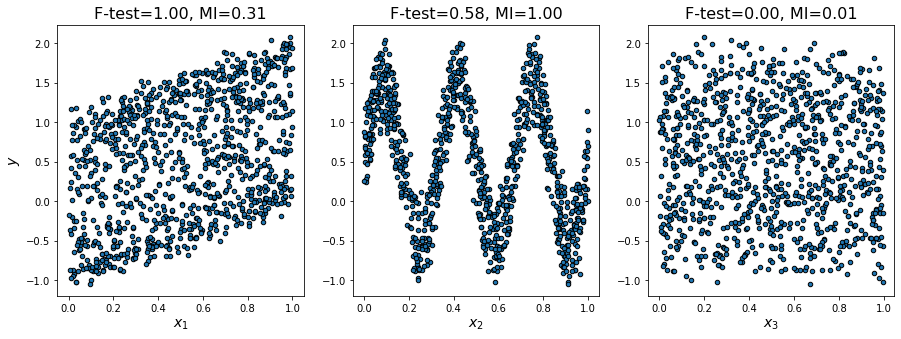

In [7]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()

#Debido a que la métrica F-test detecta dependencias lineales, su valor es máximo (1) para el atributo x1. Sin embargo, su valor se reduce
#considerablemente para el atributo x3, debido a que la señal de dependencia lineal de este con la clase es baja.

#Con respecto a la métrica de información mutua, su valor es máximo en el atributo x2, pues la dependencia no lineal (sinusoidal) está muy bien marcada
